In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Auto dataset in a DataFrame using Pandas

In [5]:
data = pd.read_csv('data/auto-dataset.csv')
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

### 1. Scatterplots between features

Text(0.5, 1.0, 'Scatter Plot of mpg vs weight')

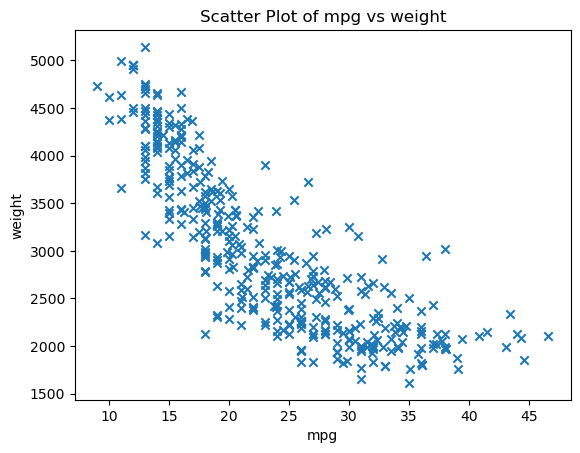

In [6]:
feat1 = data['mpg']
feat2 = data['weight']
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of mpg vs weight')
#Similarly add scatter plots for every pair of features

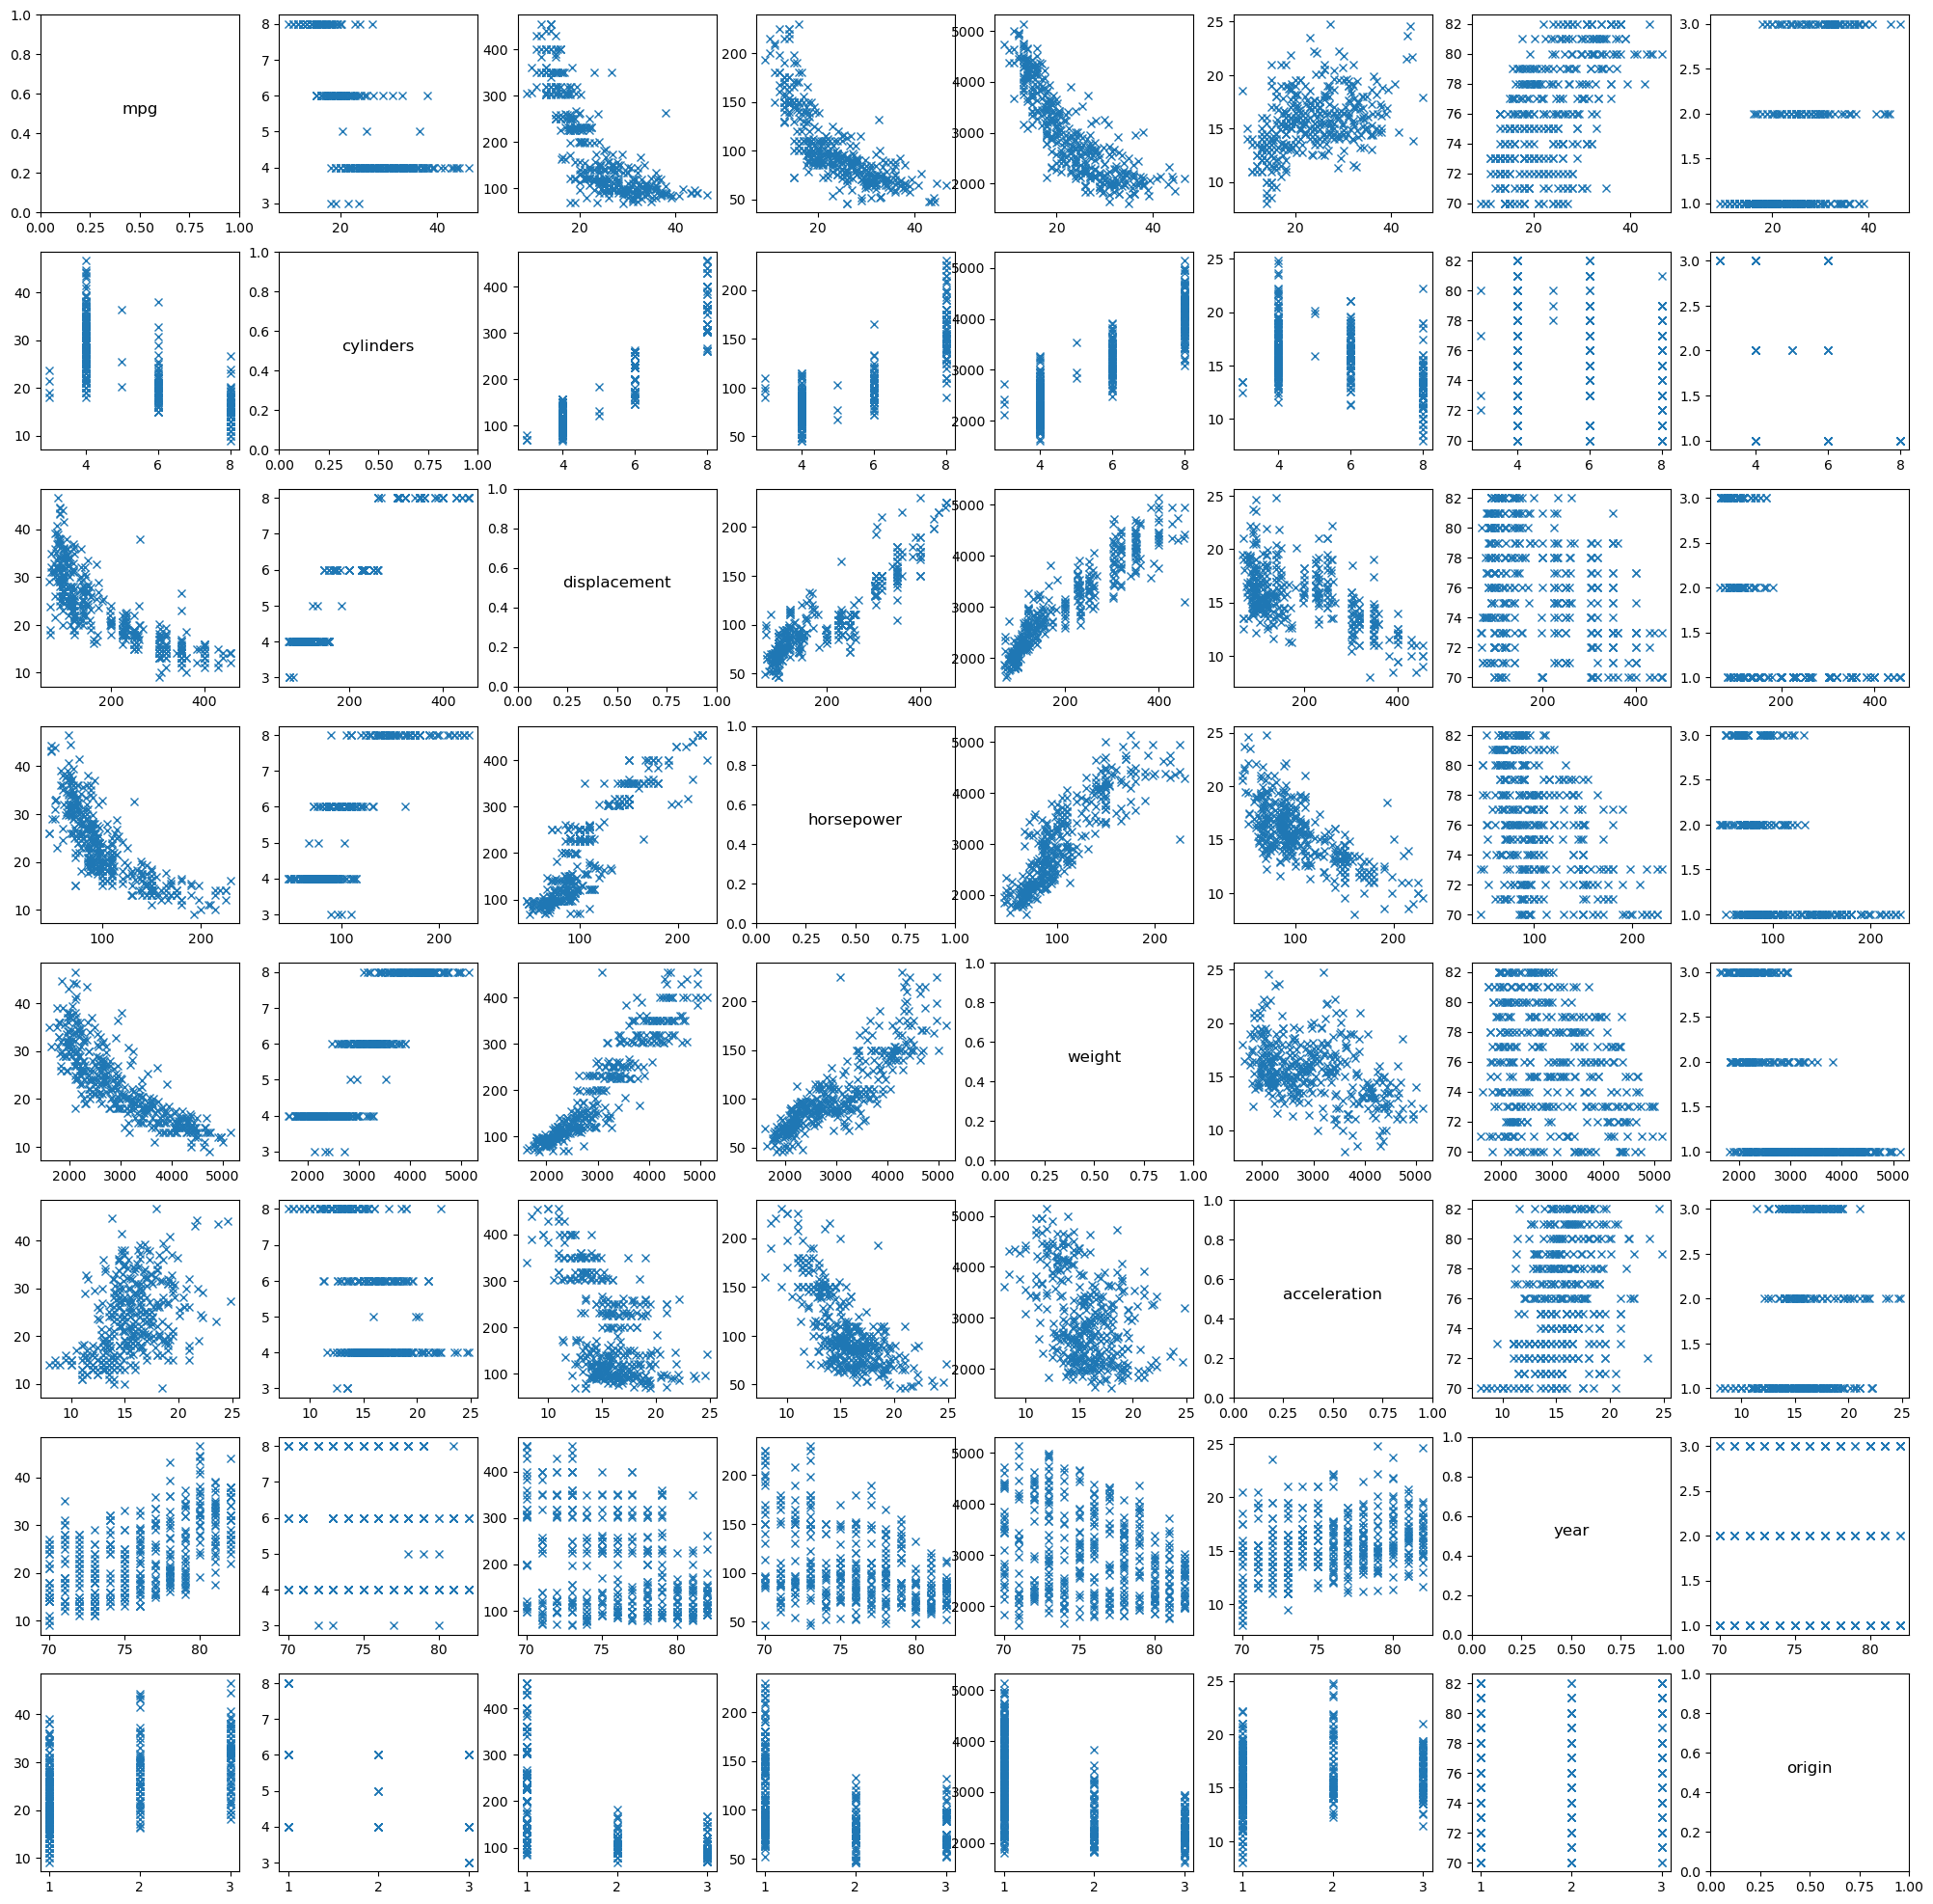

In [23]:
# Plot the feature plots to observe the relationships between all the predictors
figure, axis=plt.subplots(8,8)
figure.set_size_inches(25,25)
for i in range(8):
    for e in range(8):
        #print(i)
        #print(e)
        if i==e:
            axis[i,e].text(s=data.iloc[:,i].name,x=0.5,y=0.5, fontsize=12, ha='center')
        else:
            #axis[i,e].set_title(f"{data.iloc[:,i].name} vs {data.iloc[:,e].name}")
            axis[i,e].plot(data.iloc[:,i],data.iloc[:,e], marker='x', linestyle=' ')
    

# Observations

There is no ideal linear example in these scatterplots, but in some cases i.e. (height and horsepower) the linear model might perform well.  
Four connections between variables:
 - relation between *mpg* and *horsepower* seems to be quadratic
 - relation between *weight* and *acceleration* seems to be random, althoug the bigger the weight the smaller the acceleration.
 - *displacement* and *weight* seem to have linear relation
 - *origin* and *cylinders*  relation shows that american cars (origin 1) tend to have more cylinders than the european/japanese counterparts

### 2. Correlation

In [8]:
# Use np corrcoef to observe the correlation between  predictors
#print(data[['mpg','cylinders']].to_numpy())
data_without_names = data.copy(deep=True)
data_without_names.drop('name', inplace=True, axis=1)
array=np.corrcoef(x=data_without_names.to_numpy(),rowvar=False)
for e in range(8):
    for i in range(8):
        if array[e,i]==1:
            array[e,i]=0
from numpy import unravel_index
print(unravel_index(array.argmax(), array.shape))
print(array)

(1, 2)
[[ 0.         -0.77761751 -0.80512695 -0.77842678 -0.83224421  0.42332854
   0.58054097  0.56520876]
 [-0.77761751  0.          0.9508233   0.84298336  0.89752734 -0.50468338
  -0.34564744 -0.56893159]
 [-0.80512695  0.9508233   0.          0.897257    0.9329944  -0.5438005
  -0.36985521 -0.61453511]
 [-0.77842678  0.84298336  0.897257    0.          0.86453774 -0.68919551
  -0.41636148 -0.45517145]
 [-0.83224421  0.89752734  0.9329944   0.86453774  0.         -0.4168392
  -0.30911988 -0.58500535]
 [ 0.42332854 -0.50468338 -0.5438005  -0.68919551 -0.4168392   0.
   0.29031611  0.21274581]
 [ 0.58054097 -0.34564744 -0.36985521 -0.41636148 -0.30911988  0.29031611
   0.          0.18152772]
 [ 0.56520876 -0.56893159 -0.61453511 -0.45517145 -0.58500535  0.21274581
   0.18152772  0.        ]]


# Observations

Based on our observations, the two most highly correlated predictors are: *weight* and *displacement*, while the most anticorrelated predictors are: *weight* and *mpg*.
Calculations showed that in fact the two most correlated predictors are: *cylinders* and *displacement* with the value of 0.95, but *weight* and *displacement* are also highly correlated with the value of 0.93. The most anticorrelated predictors according to the calculations are *mpg* and *weight* with a correlation coefficient of -0.83

### 3. Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
y = np.array(data['mpg'])
x = np.array(data['cylinders'])
print(x.shape, y.shape)

# Use the fit function and the score function in linear regression module of sklearn to  fit the data and observe the fit
arr_x= [[item] for item in x]
arr_y = [[item] for item in y]
linear_model.fit(arr_x,arr_y)
r_squared=linear_model.score(arr_x, arr_y)
print(f"R^2 for the cylinders is equal to {r_squared.round(3)}")






# print(linear_model. )
#x.values.reshape(-1,1)
#print(x)
#x.reshape(-1,1)
#arr_x= [[item] for item in x]
#arr_y = [[item] for item in y]
#print(arr_x)
#linear_model.fit(arr_x,arr_y)
#r_squared=linear_model.score(arr_x, arr_y)

(392,) (392,)
R^2 for the cylinders is equal to 0.605


In [10]:
# Fit the linear regression on mpg for the other features: cylinder, horsepower, year and displacement
list_of_predictors=["cylinders", "displacement", "horsepower", "year"]
arr_y = [[item] for item in y]
for predictor in list_of_predictors:
    x=np.array(data[predictor])
    arr_x= [[item] for item in x]
    linear_model.fit(arr_x,arr_y)
    r_squared=linear_model.score(arr_x, arr_y)
    print(f"R^2 for the {predictor} is equal to {r_squared.round(3)} and the coefficients are equal to: {linear_model.coef_[0][0]}")
    residuals = []
    for i in range(len(arr_y)):
        residuals.append(pow(arr_y[i][0] - linear_model.predict(arr_x),2))
    #print(residuals)
    se=np.sqrt(1/(len(arr_y)-2)*np.sum(residuals)/(np.var(arr_x)*len(arr_x)))
    t=linear_model.coef_[0][0]/se
    print(f"t statistic is equal to {t}")

R^2 for the cylinders is equal to 0.605 and the coefficients are equal to: -3.558078367621503
t statistic is equal to -0.6122938029103457
R^2 for the displacement is equal to 0.648 and the coefficients are equal to: -0.06005142781220626
t statistic is equal to -0.6255251906499713
R^2 for the horsepower is equal to 0.606 and the coefficients are equal to: -0.15784473335365365
t statistic is equal to -0.6126906690334281
R^2 for the year is equal to 0.337 and the coefficients are equal to: 1.2300354634480297
t statistic is equal to 0.5007857016350502


In [14]:
#Multiple Linear Regression
#Create a 2D matrix with each column representing all features
#Look up np.concatenate or np.stack
data_without_names = data.copy(deep=True)
data_without_names.drop('name', inplace=True, axis=1)
data_without_names.drop('mpg', inplace=True,axis=1)
#print(data_without_names)
#print(data_without_names.T.to_numpy())
linear_model.fit(data_without_names.to_numpy(),arr_y)
r_squared = linear_model.score(data_without_names.to_numpy(),arr_y)
coef = linear_model.coef_
print(f"R^2 equals {r_squared}  and predictions equals to {coef}")

#Print the predictions of the your fitted model and the weights of Linear Regression (look at the function get_params())
print(f"get params: {linear_model.get_params()}")
import random
for i in random.sample(range(0,390),5):
    x=[data_without_names.to_numpy()[i,:]]
    #print(x.shape)
    #print(x)
   #print(arr_y[i][0])
    print(f"value predicted by the model equls to {linear_model.predict(x)[0][0].round(2)} while the true value was { arr_y[i][0]}")

R^2 equals 0.8214780764810597  and predictions equals to [[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
   1.4261405 ]]
get params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
value predicted by the model equls to 28.34 while the true value was 30.9
value predicted by the model equls to 26.47 while the true value was 26.4
value predicted by the model equls to 30.76 while the true value was 32.0
value predicted by the model equls to 17.57 while the true value was 17.5
value predicted by the model equls to 24.0 while the true value was 17.6


# Observations

 - Multiple linear regression yields much better $R^2$ than all of the simple linear regressions.  
 - significane: TODO
 - the sign of the coeeficient tells us whetver they are correlated positevely or negatively
 

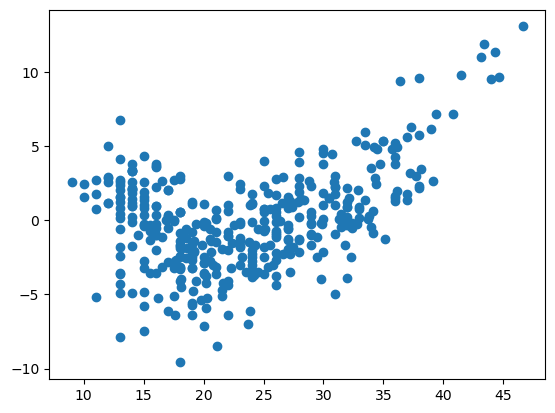

In [12]:
#Make a scatter plot of the residual vs the predictions of your linear regression model
residuals = []
for i in range(len(arr_y)):
    residuals.append(((arr_y[i][0] - linear_model.predict([data_without_names.to_numpy()[i,:]])))[0][0])

#print(residuals)
plt.plot([y[0] for y in arr_y], residuals,marker='o', linestyle=' ')

# Observations

The residuals plot suggests non-linearity, because of the "banana shape" of the plot.